<a href="https://colab.research.google.com/github/OmerElshrief/Stereo-Vision-Dynamic-programming-approach-/blob/master/Stereo_Vision_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Programming


In [0]:
import numpy as np
import imageio
import cv2
from matplotlib import pyplot as plt

In [0]:
def get_cost(i1,i2,sigma_squared = 4):
  
  return (i1-i2) * (i1-i2)  / (sigma_squared)

def load_images(url1,url2,rgb=1):
  original_Left_Image = cv2.imread(url1,rgb)
  original_Right_Image = cv2.imread(url2,rgb)
  if rgb:
    original_Left_Image = cv2.cvtColor(original_Left_Image,cv2.COLOR_RGB2GRAY)
    original_Right_Image = cv2.cvtColor(original_Right_Image,cv2.COLOR_RGB2GRAY)
  original_Left_Image = cv2.GaussianBlur(original_Left_Image,(5,5),0)
  original_Right_Image= cv2.GaussianBlur(original_Right_Image,(5,5),0)
  leftImage = np.asarray(original_Left_Image, dtype = np.float)
  rightImage = np.asarray(original_Right_Image, dtype = np.float)
  return leftImage,rightImage

def show_results(img1,img2,disparity_Left,disparity_Right):
  plt.figure()
  fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, constrained_layout=False, figsize=(16,9))
  ax1.imshow(img1, cmap="gray")
  ax1.set_xlabel("Left image")
  ax2.imshow(img2, cmap="gray")
  ax2.set_xlabel("Right Image")

  ax3.imshow(disparity_Left, cmap="gray")
  ax3.set_xlabel("disparity_Left")

  ax4.imshow(disparity_Right, cmap="gray")
  ax4.set_xlabel("disparity_Right")

  plt.show


In [0]:

def get_disparity(img1,img2):
  
  
  rows,columns = img1.shape
  print(rows, columns)
  #### Initializations:

  # Constructin matrix for the Intermediate values
  # Columns are also the Number of Pixels in each line
  # The matrix is N x N where N is the number of pixels in each line.
  D = np.empty([columns, columns], dtype=np.float)
  # For path and backtracking.
  M = np.empty([columns, columns], dtype=np.float)

  disparity_Left = np.empty([rows, columns], dtype=np.float)
  disparity_Right = np.empty([rows, columns], dtype=np.float)

  co = 6    # As required 
  cost = 0.0 
  sigma = 2
  simga_squared = 4
  D[0, 0] = 0
  print("Processing..")
  for row in range(0,rows):
    # print("Processing row ",row)

    D[0,0] = get_cost(img1[row, 0] , img2[row, 0])
    for i in range(1, columns):
          D[i, 0] = i * co
          D[0, i] = i * co

    for i in range(0, columns):
      
      for j in range(0, columns):

        # Cost function for matching features in the left and right images
        cost = get_cost(img1[row, i] , img2[row, j])
        
        min1 = D[i-1, j-1] + cost
        min2 = D[i-1, j] + co
        min3 = D[i, j-1] + co

        cmin = min(min1, min2, min3)
        # print(cmin)
        D[i, j] = cmin
        
        # Forming path matrix
        if(cmin == min1):
            M[i, j] = 1
        if(cmin == min2):
            M[i, j] = 2
        if(cmin == min3):
            M[i, j] = 3


    p = columns - 1
    q = columns - 1
    
    if row == 50:
      plt.figure()
      plt.ylim(i)
      plt.xlim(j)
      
    while(p != 0 and q !=0):
        
        # if feature in left and right image matches
        if(M[p, q] == 1):
            disparity_Left[row, p] = abs(p-q)
            disparity_Right[row, q] = abs(q-p)                

            p = p - 1
            q = q - 1
            if row ==50:
              # Plot a Diagonal line
              plt.plot( [0,p], [q,0],color = 'red')

        # if feature in left image is occuluded
        elif(M[p, q] == 2):
            disparity_Left[row, p] = 0
            p = p - 1
            if row ==50:
              # Draw a Vertical line
              plt.axvline(x = p,color = 'blue')
    
        # if feature in right image is occuluded
        elif(M[p, q] == 3): just
            disparity_Right[row, q] = 0
            q = q - 1
            if row ==50:
              # Draw a Horizontal line
              plt.axhline(q,color = "green")
            
    plt.show()     
    D = np.empty([columns, columns], dtype=np.float)
    M = np.empty([columns, columns], dtype=np.float)
  return cv2.GaussianBlur(disparity_Left,(5,5),0),cv2.GaussianBlur(disparity_Right,(5,5),0)



## Test 1: CO = 1

375 450
Processing..


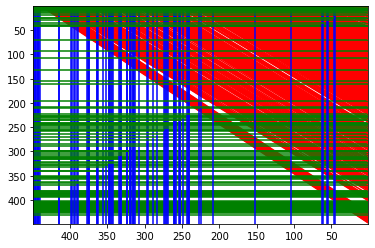

<Figure size 432x288 with 0 Axes>

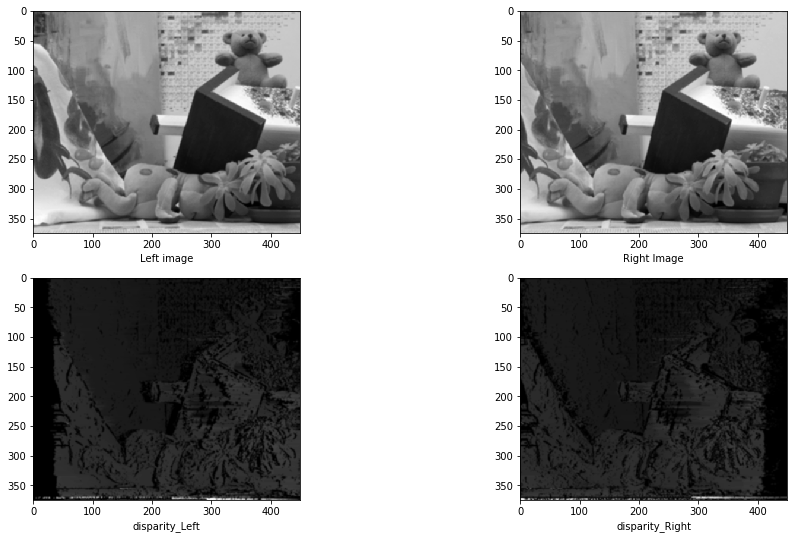

In [0]:
img1_url = 'im2.ppm'
img2_url = 'im6.ppm'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)
show_results(img1,img2,disparity_Left,disparity_Right)
  

375 450
Processing..


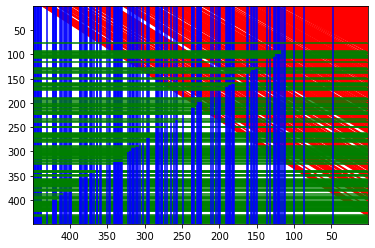

<Figure size 432x288 with 0 Axes>

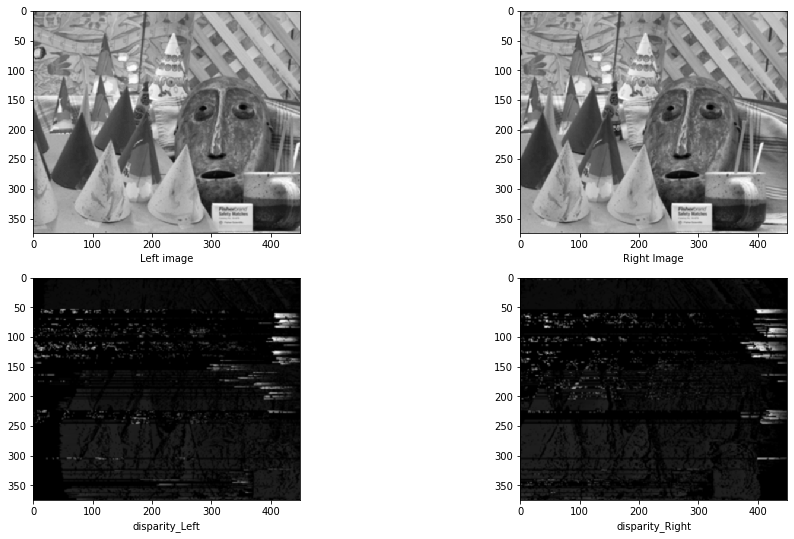

In [0]:
img1_url = 'im2.png'
img2_url = 'im6.png'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)
show_results(img1,img2,disparity_Left,disparity_Right)
  

375 450
Processing..


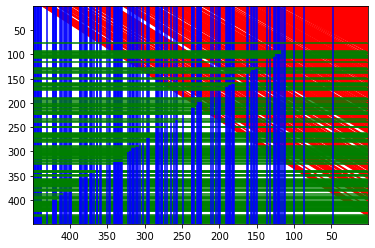

<Figure size 432x288 with 0 Axes>

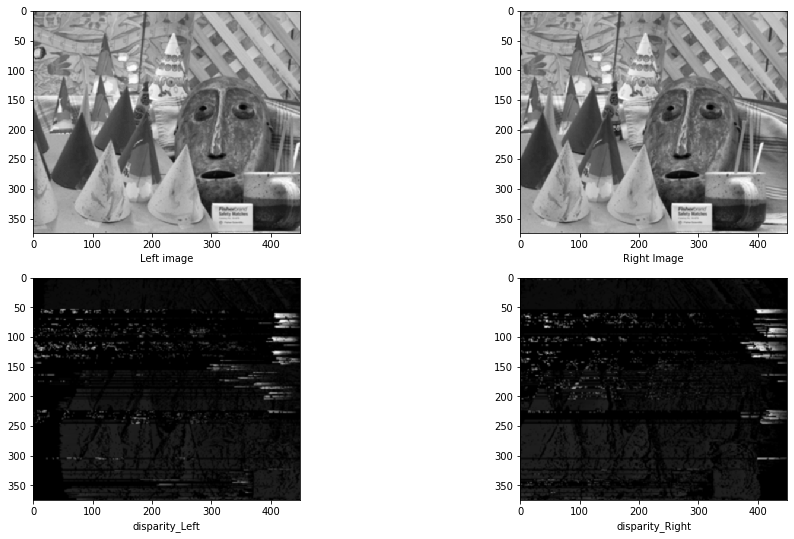

In [0]:
img1_url = 'im2.png'
img2_url = 'im6.png'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)

show_results(img1,img2,disparity_Left,disparity_Right)
  

# Test2: CO = 4

375 450
Processing..


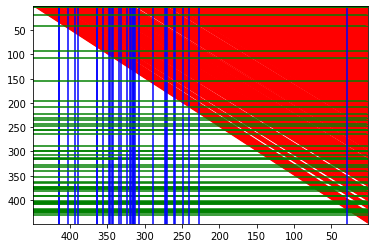

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:401: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:406: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


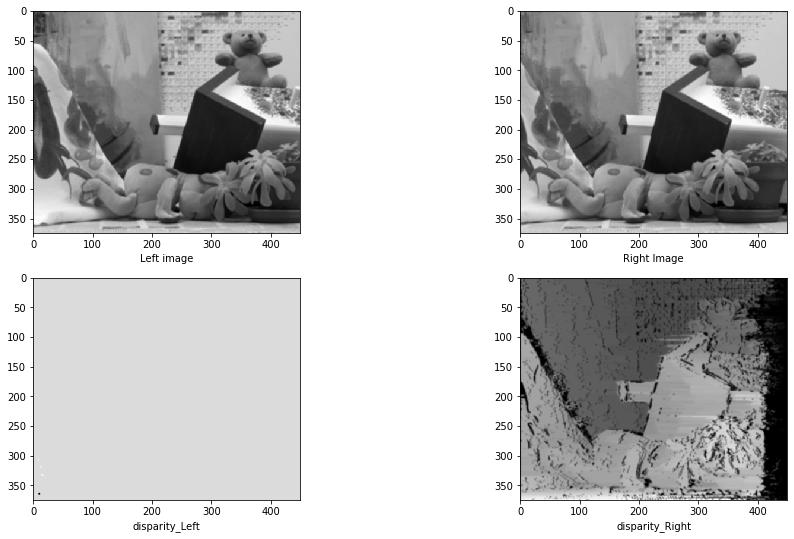

In [0]:
img1_url = 'im2.ppm'
img2_url = 'im6.ppm'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)
show_results(img1,img2,disparity_Left,disparity_Right)
  

## Test 2: CO = 6

375 450
Processing..


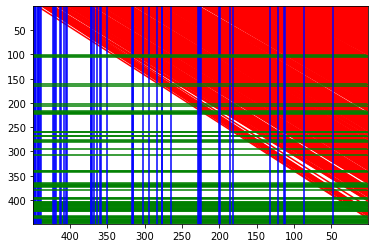

<Figure size 432x288 with 0 Axes>

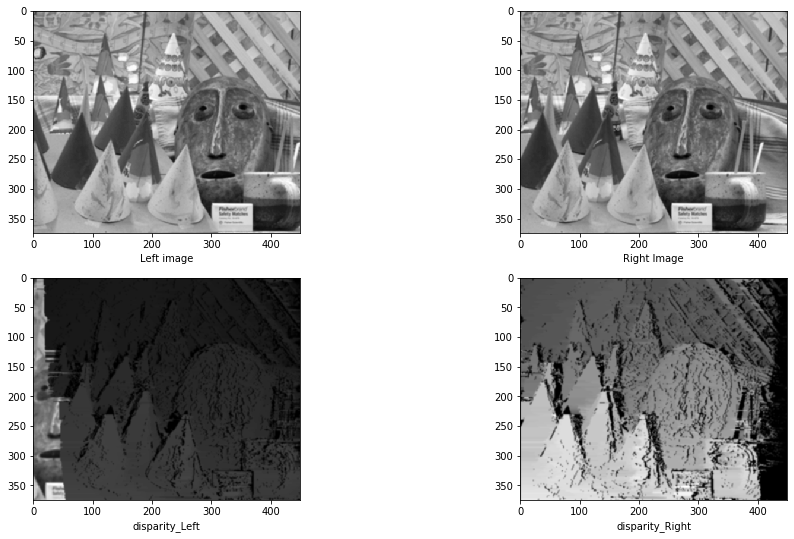

In [0]:
img1_url = 'im2.png'
img2_url = 'im6.png'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)

show_results(img1,img2,disparity_Left,disparity_Right)
  

375 450
Processing..


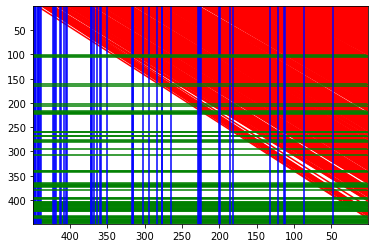

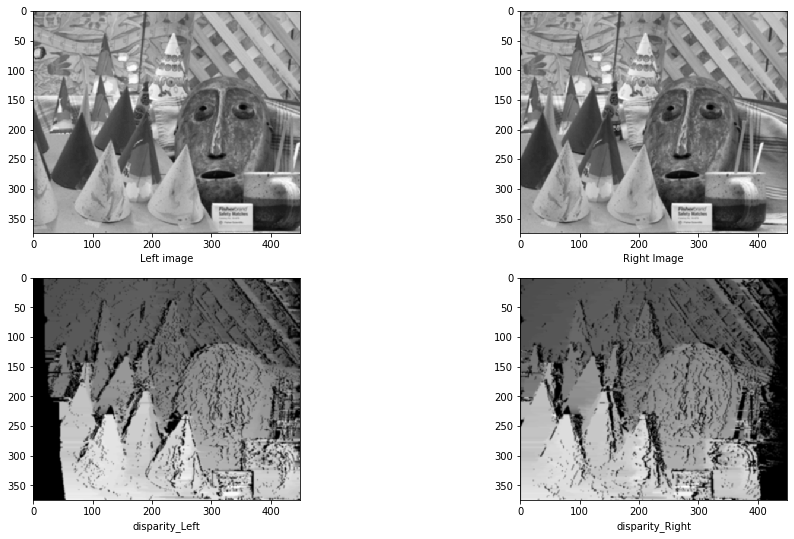

In [0]:
img1_url = 'im2.png'
img2_url = 'im6.png'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)

show_results(img1,img2,disparity_Left,disparity_Right)
  

375 450
Processing..


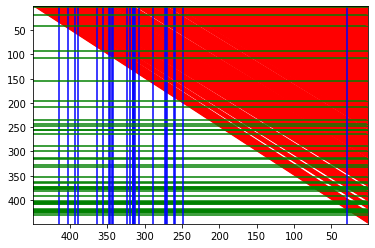

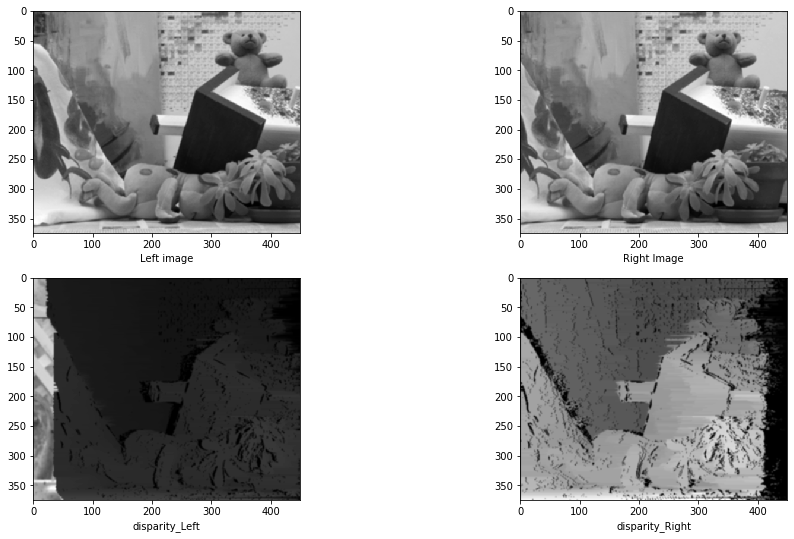

In [0]:
img1_url = 'im2.ppm'
img2_url = 'im6.ppm'
img1,img2 = load_images(img1_url,img2_url)
disparity_Left,disparity_Right = get_disparity(img1,img2)
show_results(img1,img2,disparity_Left,disparity_Right)
  